In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn import set_config
set_config(display='diagram')

In [2]:
np.random.seed(0)
df = pd.read_csv("/kaggle/input/dataset/SMHS_general-1.csv")                 # Main dataset
df_val = pd.read_csv("/kaggle/input/dataset/SMHS_validation_students-1.csv")# External validation dataset

print("Shape of main dataset:", df.shape)
df.head()


Shape of main dataset: (1500, 29)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,age,sex,ethnicity,latent_cluster,deprivation_index,smoking_status,alcohol_units_week,physical_activity_minutes,diet_quality_score,...,fasting_glucose,fasting_insulin,triglycerides,hdl,ldl,crp,alt,shift_worker,family_history_diabetes,metabolic_pressure
0,1,56,F,White,3,74.968216,Former,NaN,92.872646,60.614177,...,7.367951,21.589497,2.607227,0.737260,2.704100,28.432087,37.267948,No,0,73.087968
1,2,59,M,White,2,34.912176,Never,NaN,26.103352,72.107270,...,6.717636,16.379792,3.112712,1.654086,3.750358,1.624550,29.042661,No,0,59.541750
2,3,49,M,Black,2,54.207211,Former,NaN,210.401582,49.249182,...,5.052053,17.104307,4.525291,1.031543,3.812500,2.236999,33.364052,No,1,54.864634
3,4,39,F,White,2,27.870993,Never,NaN,214.605575,61.195129,...,6.018634,21.739572,1.322513,1.232799,4.086235,NaN,22.496442,No,0,49.199538
4,5,45,F,Other,3,72.684155,Never,21.249861,135.063492,49.828539,...,5.826059,16.918793,2.312573,1.014607,3.390955,5.999061,51.853812,No,0,70.674299


In [14]:
print("Shape of main dataset:", df_val.shape)
df_val.head()


Shape of main dataset: (100, 28)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,age,sex,ethnicity,latent_cluster,deprivation_index,smoking_status,alcohol_units_week,physical_activity_minutes,diet_quality_score,...,steps_per_day,fasting_glucose,fasting_insulin,triglycerides,hdl,ldl,crp,alt,shift_worker,family_history_diabetes
0,New_1501,64,M,White,2,38.797115,Never,NaN,137.058975,68.493397,...,10046.873585,6.261428,13.285703,1.672171,1.220523,4.174913,4.791479,37.253269,No,1
1,New_1502,58,F,SouthAsian,4,73.523574,Never,NaN,197.262223,56.065424,...,10752.546507,7.595936,3.382107,0.558177,1.205101,2.906692,42.129601,27.379237,Yes,0
2,New_1503,30,M,Black,3,60.183207,Never,NaN,180.377810,64.964737,...,1899.341332,7.407420,20.307675,1.812546,0.796172,3.565524,0.351280,37.622963,No,0
3,New_1504,40,F,White,1,39.046469,Never,NaN,401.335848,88.031008,...,10911.317096,5.214037,6.006388,0.888212,1.609681,3.038253,1.348363,21.692810,No,0
4,New_1505,50,F,SouthAsian,1,64.513502,Never,NaN,348.783923,81.742457,...,10738.897061,5.337186,NaN,0.677383,1.900981,2.280214,1.181209,17.143403,No,1


In [3]:
# separate numeric and categorical features
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object","bool"]).columns.tolist()

print("Numeric variables:", numeric_cols)
print("Categorical variables:", categorical_cols)


Numeric variables: ['id', 'age', 'latent_cluster', 'deprivation_index', 'alcohol_units_week', 'physical_activity_minutes', 'diet_quality_score', 'depression_score', 'bmi', 'waist_hip_ratio', 'sbp', 'dbp', 'sleep_duration_hours', 'sleep_variability_hours', 'sleep_efficiency', 'steps_per_day', 'fasting_glucose', 'fasting_insulin', 'triglycerides', 'hdl', 'ldl', 'crp', 'alt', 'family_history_diabetes', 'metabolic_pressure']
Categorical variables: ['sex', 'ethnicity', 'smoking_status', 'shift_worker']


In [12]:
# separate numeric and categorical features
numeric_cols_val = df_val.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical_cols_val = df_val.select_dtypes(include=["object","bool"]).columns.tolist()

print("Numeric variables:", numeric_cols_val)
print("Categorical variables:", categorical_cols_val)


Numeric variables: ['age', 'latent_cluster', 'deprivation_index', 'alcohol_units_week', 'physical_activity_minutes', 'diet_quality_score', 'depression_score', 'bmi', 'waist_hip_ratio', 'sbp', 'dbp', 'sleep_duration_hours', 'sleep_variability_hours', 'sleep_efficiency', 'steps_per_day', 'fasting_glucose', 'fasting_insulin', 'triglycerides', 'hdl', 'ldl', 'crp', 'alt', 'family_history_diabetes']
Categorical variables: ['id', 'sex', 'ethnicity', 'smoking_status', 'shift_worker']


In [4]:
X_reduced = df.loc[:, ['id', 'age', 'latent_cluster', 'deprivation_index', 'alcohol_units_week', 'physical_activity_minutes', 'diet_quality_score', 'depression_score', 'bmi', 'waist_hip_ratio', 'sbp', 'dbp', 'sleep_duration_hours', 'sleep_variability_hours', 'sleep_efficiency', 'steps_per_day', 'fasting_glucose', 'fasting_insulin', 'triglycerides', 'hdl', 'ldl', 'crp', 'alt', 'family_history_diabetes', 'metabolic_pressure', 'sex', 'ethnicity', 'smoking_status', 'shift_worker']]
print(X_reduced)
            

        id  age  latent_cluster  deprivation_index  alcohol_units_week  \
0        1   56               3          74.968216                 NaN   
1        2   59               2          34.912176                 NaN   
2        3   49               2          54.207211                 NaN   
3        4   39               2          27.870993                 NaN   
4        5   45               3          72.684155           21.249861   
...    ...  ...             ...                ...                 ...   
1495  1496   54               4          43.166878            0.798987   
1496  1497   66               4          41.969237                 NaN   
1497  1498   51               1          31.377529                 NaN   
1498  1499   48               1          18.191960                 NaN   
1499  1500   59               2          50.586559                 NaN   

      physical_activity_minutes  diet_quality_score  depression_score  \
0                     92.872646       

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [15]:
X_reduced_val = df_val.loc[:, ['id', 'age', 'latent_cluster', 'deprivation_index', 'alcohol_units_week', 'physical_activity_minutes', 'diet_quality_score', 'depression_score', 'bmi', 'waist_hip_ratio', 'sbp', 'dbp', 'sleep_duration_hours', 'sleep_variability_hours', 'sleep_efficiency', 'steps_per_day', 'fasting_glucose', 'fasting_insulin', 'triglycerides', 'hdl', 'ldl', 'crp', 'alt', 'family_history_diabetes', 'sex', 'ethnicity', 'smoking_status', 'shift_worker']]
print(X_reduced_val)
            

          id  age  latent_cluster  deprivation_index  alcohol_units_week  \
0   New_1501   64               2          38.797115                 NaN   
1   New_1502   58               4          73.523574                 NaN   
2   New_1503   30               3          60.183207                 NaN   
3   New_1504   40               1          39.046469                 NaN   
4   New_1505   50               1          64.513502                 NaN   
..       ...  ...             ...                ...                 ...   
95  New_1596   55               1          70.197625                 NaN   
96  New_1597   44               1          45.291579                 NaN   
97  New_1598   48               1          40.383072                 NaN   
98  New_1599   48               4          51.095489                 NaN   
99  New_1600   45               1          49.508517            4.254295   

    physical_activity_minutes  diet_quality_score  depression_score  \
0               

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


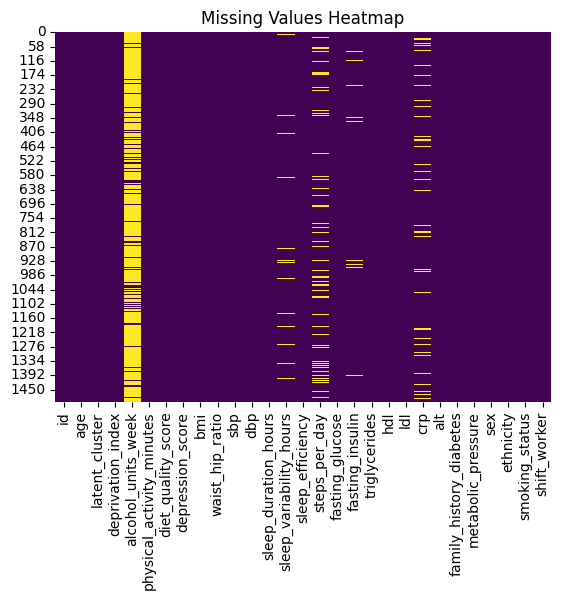

In [5]:
sns.heatmap(X_reduced.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

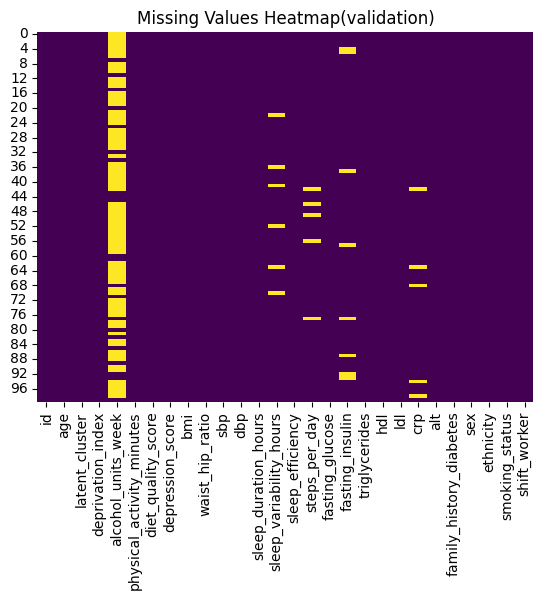

In [16]:
sns.heatmap(X_reduced_val.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap(validation)")
plt.show()

Numeric features in X_reduced: ['id', 'age', 'latent_cluster', 'deprivation_index', 'alcohol_units_week', 'physical_activity_minutes', 'diet_quality_score', 'depression_score', 'bmi', 'waist_hip_ratio', 'sbp', 'dbp', 'sleep_duration_hours', 'sleep_variability_hours', 'sleep_efficiency', 'steps_per_day', 'fasting_glucose', 'fasting_insulin', 'triglycerides', 'hdl', 'ldl', 'crp', 'alt', 'family_history_diabetes', 'metabolic_pressure']
Categorical features in X_reduced: ['sex', 'ethnicity', 'smoking_status', 'shift_worker']
id                              int64
age                             int64
latent_cluster                  int64
deprivation_index             float64
alcohol_units_week            float64
physical_activity_minutes     float64
diet_quality_score            float64
depression_score              float64
bmi                           float64
waist_hip_ratio               float64
sbp                           float64
dbp                           float64
sleep_duration_ho

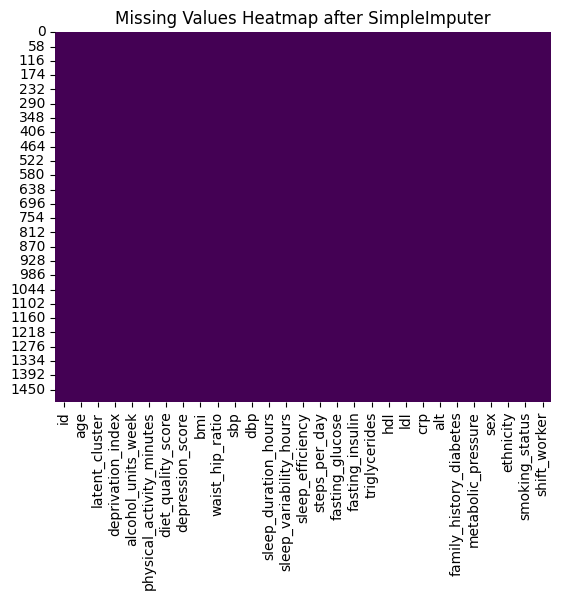

After KNNImputer (numeric features only):
                id          age  latent_cluster  deprivation_index  \
count  1500.000000  1500.000000     1500.000000        1500.000000   
mean    750.500000    50.485333        2.171333          49.182916   
std     433.157015    12.509601        1.070238          18.374494   
min       1.000000   -40.000000        1.000000           0.000000   
25%     375.750000    44.000000        1.000000          35.593492   
50%     750.500000    51.000000        2.000000          49.296179   
75%    1125.250000    57.000000        3.000000          61.855031   
max    1500.000000   340.000000        4.000000         100.000000   

       alcohol_units_week  physical_activity_minutes  diet_quality_score  \
count         1500.000000                1500.000000         1500.000000   
mean            10.089247                 197.559683           68.636518   
std              3.993732                  99.386868           14.129799   
min              0.0000

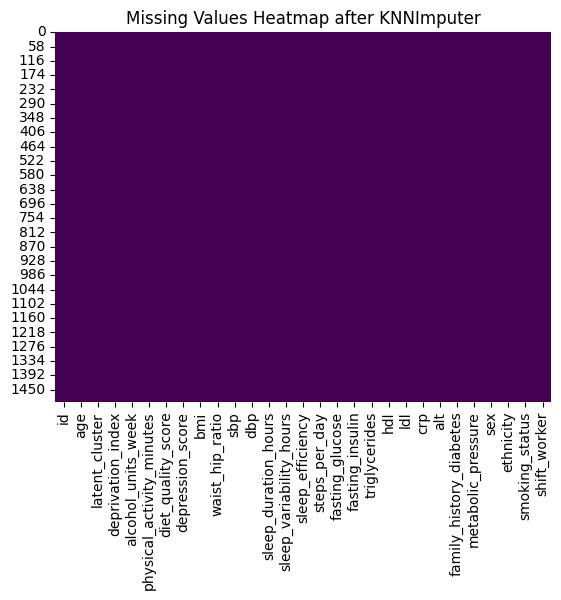

In [6]:
# -----------------------------
# 1. Define numeric and categorical columns in X_reduced
# -----------------------------

# Re-identify numeric and categorical columns specifically in X_reduced
numeric_features = X_reduced.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_reduced.select_dtypes(include=["object", "bool"]).columns.tolist()

print("Numeric features in X_reduced:", numeric_features)
print("Categorical features in X_reduced:", categorical_features)

# -----------------------------
# 2. Make sure categorical variables have categorical dtype
# -----------------------------
X_reduced[categorical_features] = X_reduced[categorical_features].astype("category")

print(X_reduced.dtypes)

# -----------------------------
# 3. Impute missing values with SimpleImputer
#    - numeric: median
#    - categorical: constant value "Missing"
# -----------------------------

# Copy the data so we keep the original version unchanged
X_simple_imp = X_reduced.copy()

# Imputer for numeric features
numeric_imputer = SimpleImputer(strategy="median")
X_simple_imp[numeric_features] = numeric_imputer.fit_transform(X_simple_imp[numeric_features])

# Imputer for categorical features
categorical_imputer = SimpleImputer(strategy="constant", fill_value="Missing")
X_simple_imp[categorical_features] = categorical_imputer.fit_transform(X_simple_imp[categorical_features])

print("After SimpleImputer:")
print(X_simple_imp.head())

# Visualize missingness after SimpleImputer
sns.heatmap(X_simple_imp.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap after SimpleImputer")
plt.show()

# -----------------------------
# 4. Optional: KNNImputer for numeric variables only
#    (can be useful to compare with SimpleImputer)
# -----------------------------

# Create a new copy for KNN-based imputation
X_knn_imp = X_reduced.copy()

# KNNImputer can only work with numeric data, so we apply it to numeric columns
knn_imputer = KNNImputer(n_neighbors=5)
X_knn_imp[numeric_features] = knn_imputer.fit_transform(X_knn_imp[numeric_features])

print("After KNNImputer (numeric features only):")
print(X_knn_imp[numeric_features].describe())

# Visualize missingness after KNNImputer
sns.heatmap(X_knn_imp.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap after KNNImputer")
plt.show()


In [ ]:
# -----------------------------
# 1. Define numeric and categorical columns in X_reduced
# -----------------------------

# Re-identify numeric and categorical columns specifically in X_reduced
numeric_features = X_reduced_val.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_reduced_val.select_dtypes(include=["object", "bool"]).columns.tolist()

print("Numeric features in X_reduced_val:", numeric_features)
print("Categorical features in X_reduced_val:", categorical_features)

# -----------------------------
# 2. Make sure categorical variables have categorical dtype
# -----------------------------
X_reduced_val[categorical_features] = X_reduced_val[categorical_features].astype("category")

print(X_reduced_val.dtypes)

# -----------------------------
# 3. Impute missing values with SimpleImputer
#    - numeric: median
#    - categorical: constant value "Missing"
# -----------------------------

# Copy the data so we keep the original version unchanged
X_simple_imp_val = X_reduced_val.copy()

# Imputer for numeric features
numeric_imputer_val = SimpleImputer(strategy="median")
X_simple_imp_val[numeric_features] = numeric_imputer_val.fit_transform(X_simple_imp_val[numeric_features])

# Imputer for categorical features
categorical_imputer_val = SimpleImputer(strategy="constant", fill_value="Missing")
X_simple_imp_val[categorical_features] = categorical_imputer_val.fit_transform(X_simple_imp_val[categorical_features])

print("After SimpleImputer:")
print(X_simple_imp_val.head())

# Visualize missingness after SimpleImputer
sns.heatmap(X_simple_imp_val.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap after SimpleImputer(val)")
plt.show()

# -----------------------------
# 4. Optional: KNNImputer for numeric variables only
#    (can be useful to compare with SimpleImputer)
# -----------------------------

# Create a new copy for KNN-based imputation
X_knn_imp_val = X_reduced_val.copy()

# KNNImputer can only work with numeric data, so we apply it to numeric columns
knn_imputer_val = KNNImputer(n_neighbors=5)
X_knn_imp_val[numeric_features] = knn_imputer_val.fit_transform(X_knn_imp_val[numeric_features])

print("After KNNImputer (numeric features only):")
print(X_knn_imp_val[numeric_features].describe())

# Visualize missingness after KNNImputer
sns.heatmap(X_knn_imp_val.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap after KNNImputer(val)")
plt.show()


In [21]:
# ===========================
# Lasso (L1) regression for metabolic_pressure (Part B)
# ===========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# ---------------------------------------------------------
# 1. Prepare target and features (REGRESSION, not classification)
# ---------------------------------------------------------

# Here X_knn_imp is assumed to be your main dataset AFTER missing-value imputation,
# still containing the original 'metabolic_pressure' column.

# Drop rows with missing target (metabolic_pressure)
df_model = X_knn_imp.dropna(subset=["metabolic_pressure"]).copy()

# >>> IMPORTANT CHANGE <<<
# For Part B we predict the continuous metabolic_pressure directly,
# so we no longer create a binary high/low label.
y = df_model["metabolic_pressure"]

# Define feature columns: drop id, latent_cluster, and the regression target
# 'id' is removed because it is just an identifier and should not be used as a predictor.
feature_cols = df_model.columns.drop(["id", "latent_cluster", "metabolic_pressure"])

X = df_model[feature_cols]

# ---------------------------------------------------------
# 2. Identify numeric and categorical columns for preprocessing
# ---------------------------------------------------------

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

print("Numeric features used:", numeric_features)
print("Categorical features used:", categorical_features)

# ---------------------------------------------------------
# 3. Build preprocessing pipelines
# ---------------------------------------------------------

# Numeric: impute missing values with median, then standardize
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical: impute missing with most frequent, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine both into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# ---------------------------------------------------------
# 4. Define L1-penalized Lasso regression model
# ---------------------------------------------------------

# We use Lasso (L1 penalty) to induce sparsity and perform feature selection
lasso_reg = Lasso(
    max_iter=10000,   # more iterations to ensure convergence
    random_state=None # Lasso itself is deterministic; no RNG needed
)

# Full pipeline: preprocessing + model
lasso_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", lasso_reg)
])

# ---------------------------------------------------------
# 5. Hyperparameter tuning with cross-validation (alpha for Lasso)
# ---------------------------------------------------------

# L1 strength is controlled by alpha.
# We search over a range of alpha values on a log scale.
param_grid = {
    "model__alpha": np.logspace(-3, 2, 10)  # from 0.001 to 100
}

# For regression we use KFold (not StratifiedKFold, which is for classification)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)

# Note: scoring='neg_root_mean_squared_error' so that higher is better (because it's negative)
grid_search = GridSearchCV(
    estimator=lasso_pipeline,
    param_grid=param_grid,
    cv=inner_cv,
    scoring="neg_root_mean_squared_error",  # primary metric for model selection
    n_jobs=-1,
    return_train_score=True
)

grid_search.fit(X, y)

best_alpha = grid_search.best_params_["model__alpha"]
best_rmse = -grid_search.best_score_

print("Best alpha (L1 regularization strength):", best_alpha)
print(f"Best cross-validated RMSE (GridSearchCV): {best_rmse:.3f}")

# ---------------------------------------------------------
# 6. Evaluate the chosen model with cross-validation (outer CV)
# ---------------------------------------------------------

# Rebuild the pipeline with the best hyperparameter for clearer reporting
best_lasso_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Lasso(
        alpha=best_alpha,
        max_iter=10000
    ))
])

# Use KFold cross-validation for model evaluation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 6.1: RMSE per fold (negative RMSE from cross_val_score)
rmse_scores = cross_val_score(
    best_lasso_pipeline,
    X,
    y,
    cv=outer_cv,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

rmse_scores = -rmse_scores  # convert to positive RMSE

print("\nRMSE for each fold:")
for i, rmse in enumerate(rmse_scores, start=1):
    print(f"  Fold {i}: RMSE = {rmse:.3f}")

print(f"\nMean CV RMSE: {rmse_scores.mean():.3f} (+/- {rmse_scores.std():.3f})")

# 6.2: Also compute R^2 via cross-validation (optional, for interpretability)
r2_scores = cross_val_score(
    best_lasso_pipeline,
    X,
    y,
    cv=outer_cv,
    scoring="r2",
    n_jobs=-1
)

print("\nR^2 for each fold:")
for i, r2 in enumerate(r2_scores, start=1):
    print(f"  Fold {i}: R^2 = {r2:.3f}")

print(f"\nMean CV R^2: {r2_scores.mean():.3f} (+/- {r2_scores.std():.3f})")

# ---------------------------------------------------------
# 7. Fit final model on ALL available training data
#    (this is the model we will save and use for external prediction)
# ---------------------------------------------------------

best_lasso_pipeline.fit(X, y)

# ---------------------------------------------------------
# 8. Inspect selected features (non-zero coefficients)
# ---------------------------------------------------------

# Get feature names after preprocessing
feature_names_num = numeric_features
feature_names_cat = best_lasso_pipeline.named_steps["preprocessor"] \
    .named_transformers_["cat"] \
    .named_steps["onehot"] \
    .get_feature_names_out(categorical_features)

all_feature_names = list(feature_names_num) + list(feature_names_cat)

# Get coefficients from the Lasso model
coef = best_lasso_pipeline.named_steps["model"].coef_  # shape (n_features,)

coef_df = pd.DataFrame({
    "feature": all_feature_names,
    "coefficient": coef,
    "abs_coefficient": np.abs(coef)
}).sort_values(by="abs_coefficient", ascending=False)

print("\nTop 20 features by absolute coefficient (importance):")
print(coef_df.head(20))

# Identify features that are effectively "selected" by L1:
# non-zero coefficients (you can also apply a small threshold instead of strict zero)
selected_features = coef_df[coef_df["coefficient"] != 0]["feature"].tolist()

print(f"\nNumber of selected features (non-zero coefficients): {len(selected_features)}")
print("Selected features (first 30 shown):")
print(selected_features[:30])

# ---------------------------------------------------------
# 9. Save trained model (pipeline) to disk
# ---------------------------------------------------------

model_path = "lasso_regression_pipeline.joblib"
joblib.dump(best_lasso_pipeline, model_path)
print(f"\nTrained Lasso regression pipeline saved to: {model_path}")

# ---------------------------------------------------------
# 10. Use the final model to predict on external validation set
#     (SMHS_validation_students-1.csv) and export submission
# ---------------------------------------------------------

# Load external validation dataset (no metabolic_pressure column)
df_val = pd.read_csv("/kaggle/input/dataset/SMHS_validation_students-1.csv")

# Use the SAME feature columns as in training
# (they should all exist in df_val, except for 'metabolic_pressure' which isn't needed)
X_val = df_val[feature_cols]

# Predict continuous metabolic_pressure for the external set
y_val_pred = best_lasso_pipeline.predict(X_val)

# Build submission DataFrame: id + predicted metabolic_pressure
submission = pd.DataFrame({
    "id": df_val["id"],
    "metabolic_pressure": y_val_pred
})

# If Kaggle sample only uses first 100 IDs, you can slice:
# submission = submission.iloc[:100].copy()

# Save to csv (no index)
submission_path = "submission_lasso_regression.csv"
submission.to_csv(submission_path, index=False)
print(f"\nSubmission file saved to: {submission_path}")


Numeric features used: ['age', 'deprivation_index', 'alcohol_units_week', 'physical_activity_minutes', 'diet_quality_score', 'depression_score', 'bmi', 'waist_hip_ratio', 'sbp', 'dbp', 'sleep_duration_hours', 'sleep_variability_hours', 'sleep_efficiency', 'steps_per_day', 'fasting_glucose', 'fasting_insulin', 'triglycerides', 'hdl', 'ldl', 'crp', 'alt', 'family_history_diabetes']
Categorical features used: ['sex', 'ethnicity', 'smoking_status', 'shift_worker']
Best alpha (L1 regularization strength): 0.1668100537200059
Best cross-validated RMSE (GridSearchCV): 5.372

RMSE for each fold:
  Fold 1: RMSE = 5.502
  Fold 2: RMSE = 5.410
  Fold 3: RMSE = 5.467
  Fold 4: RMSE = 5.067
  Fold 5: RMSE = 5.294

Mean CV RMSE: 5.348 (+/- 0.157)

R^2 for each fold:
  Fold 1: R^2 = 0.876
  Fold 2: R^2 = 0.869
  Fold 3: R^2 = 0.852
  Fold 4: R^2 = 0.879
  Fold 5: R^2 = 0.881

Mean CV R^2: 0.872 (+/- 0.011)

Top 20 features by absolute coefficient (importance):
                      feature  coefficien

Numeric features used in Decision Tree Regression: ['age', 'deprivation_index', 'alcohol_units_week', 'physical_activity_minutes', 'diet_quality_score', 'depression_score', 'bmi', 'waist_hip_ratio', 'sbp', 'dbp', 'sleep_duration_hours', 'sleep_variability_hours', 'sleep_efficiency', 'steps_per_day', 'fasting_glucose', 'fasting_insulin', 'triglycerides', 'hdl', 'ldl', 'crp', 'alt', 'family_history_diabetes']
Categorical features used in Decision Tree Regression: ['sex', 'ethnicity', 'smoking_status', 'shift_worker']
Fitting GridSearchCV for Decision Tree Regression...
Fitting 5 folds for each of 960 candidates, totalling 4800 fits

Best hyperparameters for Decision Tree Regression:
{'model__ccp_alpha': 0.0, 'model__max_depth': 8, 'model__max_features': None, 'model__min_samples_leaf': 10, 'model__min_samples_split': 2}
Best CV mean MSE (inner 5-fold): 38.594
Best CV mean RMSE (inner 5-fold): 6.212

Per-fold RMSE (Decision Tree Regression):
  Fold 1: RMSE = 6.451
  Fold 2: RMSE = 5.920
 

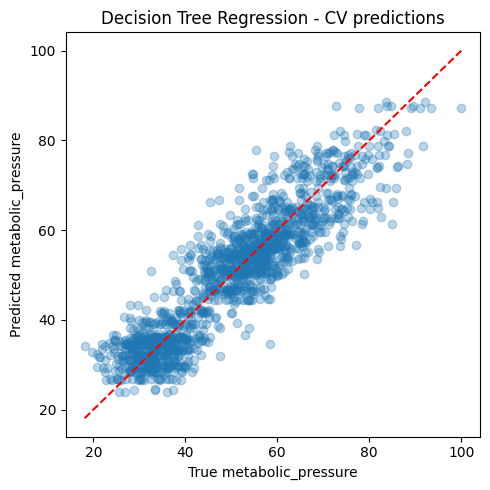


Top 20 features by Decision Tree Regression importance:
                      feature  importance
14            fasting_glucose    0.664014
15            fasting_insulin    0.134892
6                         bmi    0.096496
10       sleep_duration_hours    0.074491
20                        alt    0.007105
0                         age    0.005266
17                        hdl    0.003047
16              triglycerides    0.002737
3   physical_activity_minutes    0.001798
5            depression_score    0.001715
8                         sbp    0.001612
13              steps_per_day    0.001498
18                        ldl    0.001182
4          diet_quality_score    0.001043
7             waist_hip_ratio    0.000955
9                         dbp    0.000853
19                        crp    0.000829
1           deprivation_index    0.000327
2          alcohol_units_week    0.000141
11    sleep_variability_hours    0.000000

Number of selected features based on Decision Tree Regressio

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, cross_val_predict  # NOTE: use KFold for regression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor   # NOTE: use regressor, not classifier
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
import joblib

# ============================================
# 1. Define target (continuous metabolic_pressure) and features
# ============================================

# NOTE: For regression we use the original continuous target
y = X_knn_imp["metabolic_pressure"].astype(float)
y.name = "metabolic_pressure"

# Drop ID and latent_cluster and target from features
X = X_knn_imp.drop(columns=["id", "latent_cluster", "metabolic_pressure"])

# Save feature column names (for external prediction later)
feature_cols = X.columns.tolist()

# Split numeric and categorical columns
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

print("Numeric features used in Decision Tree Regression:", numeric_features)
print("Categorical features used in Decision Tree Regression:", categorical_features)

# ============================================
# 2. Preprocessing: imputation + one-hot encoding
#    (no scaling needed for decision trees)
# ============================================

# For numeric features: median imputation
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# For categorical features: most_frequent imputation + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessing for numeric and categorical data
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# ============================================
# 3. Define Decision Tree *Regressor* model and pipeline
# ============================================

# Base regression tree
dt = DecisionTreeRegressor(
    random_state=42
)

dt_reg = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", dt)
])

# ============================================
# 4. Hyperparameter tuning with GridSearchCV (regression)
#    (5-fold K-Fold CV)
# ============================================

param_grid_dt = {
    "model__max_depth": [3, 5, 8, 10, None],
    "model__min_samples_split": [2, 5, 10, 20],
    "model__min_samples_leaf": [1, 2, 5, 10],
    "model__max_features": [None, "sqrt", "log2"],
    "model__ccp_alpha": [0.0, 0.0005, 0.001, 0.005]  # cost-complexity pruning
}

# NOTE: For regression we use KFold (no stratification)
cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)

# Use negative MSE as scoring (higher is better because it is negative)
grid_dt = GridSearchCV(
    estimator=dt_reg,
    param_grid=param_grid_dt,
    cv=cv_inner,
    scoring="neg_mean_squared_error",  # regression metric for model selection
    n_jobs=-1,
    verbose=1,
    refit=True
)

print("Fitting GridSearchCV for Decision Tree Regression...")
grid_dt.fit(X, y)

# Convert best_score_ (negative MSE) to RMSE for easier interpretation
best_mse = -grid_dt.best_score_
best_rmse = np.sqrt(best_mse)

print("\nBest hyperparameters for Decision Tree Regression:")
print(grid_dt.best_params_)
print(f"Best CV mean MSE (inner 5-fold): {best_mse:.3f}")
print(f"Best CV mean RMSE (inner 5-fold): {best_rmse:.3f}")

best_dt_reg = grid_dt.best_estimator_

# ============================================
# 5. Outer CV: evaluate tuned model (5-fold K-Fold CV)
#    -> Gives more honest performance estimation
# ============================================

cv_outer = KFold(n_splits=5, shuffle=True, random_state=123)

# Per-fold negative MSE scores (we will convert to RMSE)
fold_neg_mse = cross_val_score(
    best_dt_reg,
    X,
    y,
    cv=cv_outer,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

fold_rmse = np.sqrt(-fold_neg_mse)

print("\nPer-fold RMSE (Decision Tree Regression):")
for i, rmse in enumerate(fold_rmse, start=1):
    print(f"  Fold {i}: RMSE = {rmse:.3f}")
print("Mean RMSE: {:.3f} +/- {:.3f}".format(fold_rmse.mean(), fold_rmse.std()))

# Cross-validated predictions for global metrics
y_pred_cv = cross_val_predict(
    best_dt_reg,
    X,
    y,
    cv=cv_outer,
    n_jobs=-1
)

# ============================================
# 6. Global regression metrics (using CV predictions)
# ============================================

mse = mean_squared_error(y, y_pred_cv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred_cv)
r2 = r2_score(y, y_pred_cv)

print("\nGlobal regression metrics (Decision Tree Regression, CV predictions):")
print(f"MSE  : {mse:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"MAE  : {mae:.3f}")
print(f"R^2  : {r2:.3f}")

# Optional: plot predicted vs true
plt.figure(figsize=(5, 5))
plt.scatter(y, y_pred_cv, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("True metabolic_pressure")
plt.ylabel("Predicted metabolic_pressure")
plt.title("Decision Tree Regression - CV predictions")
plt.tight_layout()
plt.show()

# ============================================
# 7. Feature importance and final feature selection suggestion
# ============================================

# Fit best Decision Tree regressor on full data to obtain feature importances
best_dt_reg.fit(X, y)

# Get numeric feature names
feature_names_num = numeric_features

# Get one-hot encoded categorical feature names
oh = best_dt_reg.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
oh_feature_names = oh.get_feature_names_out(categorical_features)

# Combine all feature names in the same order that the model sees them
all_feature_names = np.concatenate([feature_names_num, oh_feature_names])

# Extract importances from Decision Tree model
importances = best_dt_reg.named_steps["model"].feature_importances_

feat_importances_dt = pd.DataFrame({
    "feature": all_feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print("\nTop 20 features by Decision Tree Regression importance:")
print(feat_importances_dt.head(20))

# Suggest feature subset: keep features above median importance
importance_threshold = feat_importances_dt["importance"].median()
selected_features_dt = feat_importances_dt[
    feat_importances_dt["importance"] > importance_threshold
]["feature"].tolist()

print("\nNumber of selected features based on Decision Tree Regression importance threshold:", len(selected_features_dt))
print("Selected features (Decision Tree Regression-based):")
print(selected_features_dt)

# ============================================
# 8. Save trained regression model (pipeline) to disk
# ============================================

model_path = "decision_tree_regression_pipeline.joblib"
joblib.dump(best_dt_reg, model_path)
print(f"\nTrained Decision Tree regression pipeline saved to: {model_path}")

# ---------------------------------------------------------
# 9. Use the final regression model to predict on external validation set
#     (SMHS_validation_students-1.csv) and export submission
# ---------------------------------------------------------

# Load external validation dataset (no metabolic_pressure column)
df_val = pd.read_csv("/kaggle/input/dataset/SMHS_validation_students-1.csv")

# Use the SAME feature columns as in training
X_val = df_val[feature_cols]

# Predict continuous metabolic_pressure for the external set
y_val_pred = best_dt_reg.predict(X_val)

# Build submission DataFrame: id + predicted metabolic_pressure
# (Change the column name to match your competition requirement: e.g. 'metabolic_pressure')
submission = pd.DataFrame({
    "id": df_val["id"],
    "metabolic_pressure": y_val_pred
})

# If sample submission only uses first 100 IDs, you can slice:
# submission = submission.iloc[:100].copy()

# Save to csv (no index)
submission_path = "submission_decision_tree_regression.csv"
submission.to_csv(submission_path, index=False)
print(f"\nSubmission file saved to: {submission_path}")


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# ============================================
# 1. Define target (continuous metabolic_pressure) and features
# ============================================

# If X_knn_imp may still contain missing in target, drop them just in case
df_reg = X_knn_imp.dropna(subset=["metabolic_pressure"]).copy()

# Continuous target: metabolic_pressure
y_reg = df_reg["metabolic_pressure"].astype(float)

# Drop ID, latent_cluster and target from features
X_reg = df_reg.drop(columns=["id", "latent_cluster", "metabolic_pressure"])

# Split numeric and categorical columns
numeric_features = X_reg.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_reg.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

print("Numeric features used in RF regression:", numeric_features)
print("Categorical features used in RF regression:", categorical_features)

# Save feature_cols for later use on external validation set
feature_cols = X_reg.columns.tolist()

# ============================================
# 2. Preprocessing: imputation + one-hot encoding
#    (no scaling needed for tree-based models)
# ============================================

# For numeric features: median imputation (robust for skewness)
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# For categorical features: most_frequent imputation + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Combine preprocessing for numeric and categorical data
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# ============================================
# 3. Define Random Forest Regressor model and pipeline
# ============================================

rf_reg = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

rf_reg_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", rf_reg)
])

# ============================================
# 4. Hyperparameter tuning with RandomizedSearchCV
#    (轻量版搜索，避免太慢)
# ============================================

param_distributions_rf = {
    "model__n_estimators": [200, 300, 400],      # fewer options than before -> faster
    "model__max_depth": [None, 8, 12, 16],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2", 0.5]
}

# For regression we use normal KFold (not StratifiedKFold)
cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)

# Optimise negative RMSE (the higher the better because it's negative)
random_search_rf = RandomizedSearchCV(
    estimator=rf_reg_pipe,
    param_distributions=param_distributions_rf,
    n_iter=15,                        # smaller n_iter for speed
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    cv=cv_inner,
    verbose=1,
    random_state=42,
    refit=True
)

print("\nFitting RandomizedSearchCV for Random Forest Regressor...")
random_search_rf.fit(X_reg, y_reg)

best_params = random_search_rf.best_params_
best_cv_rmse = -random_search_rf.best_score_
print("\nBest hyperparameters for RF regression:")
print(best_params)
print(f"Best inner-CV RMSE: {best_cv_rmse:.3f}")

best_rf_reg = random_search_rf.best_estimator_

# ============================================
# 5. Outer CV: evaluate tuned model (5-fold KFold CV) with RMSE
# ============================================

cv_outer = KFold(n_splits=5, shuffle=True, random_state=123)

# Per-fold negative RMSE scores
neg_rmse_scores = cross_val_score(
    best_rf_reg,
    X_reg,
    y_reg,
    cv=cv_outer,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

rmse_scores = -neg_rmse_scores  # convert to positive RMSE

print("\nPer-fold RMSE (Random Forest Regressor):")
for i, s in enumerate(rmse_scores, start=1):
    print(f"  Fold {i}: RMSE = {s:.3f}")
print("Mean RMSE: {:.3f} ± {:.3f}".format(rmse_scores.mean(), rmse_scores.std()))

# Cross-validated predictions to inspect residuals etc.
y_pred_cv_reg = cross_val_predict(
    best_rf_reg,
    X_reg,
    y_reg,
    cv=cv_outer,
    n_jobs=-1
)

mse_cv = mean_squared_error(y_reg, y_pred_cv_reg)
rmse_cv = np.sqrt(mse_cv)
print(f"\nGlobal CV MSE : {mse_cv:.3f}")
print(f"Global CV RMSE: {rmse_cv:.3f}")

# ============================================
# 6. Fit final model on full training data for deployment
# ============================================

best_rf_reg.fit(X_reg, y_reg)

# (可选) 特征重要性
num_feats_rf = numeric_features
ohe_rf = best_rf_reg.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
cat_feats_rf = ohe_rf.get_feature_names_out(categorical_features)
all_feature_names_rf = np.concatenate([num_feats_rf, cat_feats_rf])

importances_rf = best_rf_reg.named_steps["model"].feature_importances_
feat_importances_rf = pd.DataFrame({
    "feature": all_feature_names_rf,
    "importance": importances_rf
}).sort_values(by="importance", ascending=False)

print("\nTop 15 features by RF regression importance:")
print(feat_importances_rf.head(15))
import joblib

# ---------------------------------------
# 7. Save final RF regression model
# ---------------------------------------
model_path = "rf_regression_pipeline.joblib"
joblib.dump(best_rf_reg, model_path)
print(f"\nTrained RF regression pipeline saved to: {model_path}")

# ---------------------------------------
# 8. Predict on external validation set and export submission
# ---------------------------------------

# Load external validation dataset (path adjust to your environment)
df_val = pd.read_csv("/kaggle/input/dataset/SMHS_validation_students-1.csv")

# Use the SAME feature columns as in training
# (should include all predictors except id/latent_cluster/metabolic_pressure)
X_val = df_val[feature_cols]

# Predict continuous metabolic_pressure
y_val_pred = best_rf_reg.predict(X_val)

# Build submission DataFrame
submission = pd.DataFrame({
    "id": df_val["id"],
    "prediction": y_val_pred
})

# 如果只需要前 100 个可以：submission = submission.iloc[:100].copy()
submission_path = "submission_rf_regression.csv"
submission.to_csv(submission_path, index=False)
print(f"\nSubmission file saved to: {submission_path}")


Numeric features used in RF regression: ['age', 'deprivation_index', 'alcohol_units_week', 'physical_activity_minutes', 'diet_quality_score', 'depression_score', 'bmi', 'waist_hip_ratio', 'sbp', 'dbp', 'sleep_duration_hours', 'sleep_variability_hours', 'sleep_efficiency', 'steps_per_day', 'fasting_glucose', 'fasting_insulin', 'triglycerides', 'hdl', 'ldl', 'crp', 'alt', 'family_history_diabetes']
Categorical features used in RF regression: ['sex', 'ethnicity', 'smoking_status', 'shift_worker']

Fitting RandomizedSearchCV for Random Forest Regressor...
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best hyperparameters for RF regression:
{'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 0.5, 'model__max_depth': 12}
Best inner-CV RMSE: 5.031

Per-fold RMSE (Random Forest Regressor):
  Fold 1: RMSE = 5.323
  Fold 2: RMSE = 4.868
  Fold 3: RMSE = 4.812
  Fold 4: RMSE = 5.008
  Fold 5: RMSE = 5.130
Mean RMSE: 5.02

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

# ============================================
# 1. Define target (continuous metabolic_pressure) and features
# ============================================

# If X_knn_imp may still contain missing in target, drop them just in case
df_reg = X_knn_imp.dropna(subset=["metabolic_pressure"]).copy()

# Continuous target: metabolic_pressure
y_reg = df_reg["metabolic_pressure"].astype(float)

# Drop ID, latent_cluster and target from features
X_reg = df_reg.drop(columns=["id", "latent_cluster", "metabolic_pressure"])

# Split numeric and categorical columns
numeric_features = X_reg.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X_reg.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

print("Numeric features used in RF regression:", numeric_features)
print("Categorical features used in RF regression:", categorical_features)

# Save feature_cols for later use on external validation set
feature_cols = X_reg.columns.tolist()

# ============================================
# 2. Preprocessing: imputation + one-hot encoding
#    (no scaling needed for tree-based models)
# ============================================

# For numeric features: median imputation (robust for skewness)
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# For categorical features: most_frequent imputation + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Combine preprocessing for numeric and categorical data
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# ============================================
# 3. Define Random Forest Regressor model and pipeline
# ============================================

rf_reg = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

rf_reg_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", rf_reg)
])

# ============================================
# 4. Hyperparameter tuning with RandomizedSearchCV
#    —— 更“激进”的搜索配置，目标：更低 RMSE
# ============================================
param_distributions_rf = {
    "model__n_estimators": [300, 500, 800],          # 多一点树，减少方差
    "model__max_depth": [6, 8, 10, 12],              # 不要无限深，控制复杂度
    "model__min_samples_split": [5, 10, 20],         # 分裂前至少要有更多样本
    "model__min_samples_leaf": [2, 4, 8],            # 叶子里至少几个样本，防止“记住”单个点
    "model__max_features": ["sqrt", 0.4, 0.6]        # 每次分裂只看部分特征
}

# param_distributions_rf = {
#     # 更多树，一般泛化更好（代价是训练更慢一些）
#     "model__n_estimators": [400, 600, 800, 1000],
#     # 允许更深的树，但通过 min_samples_leaf 控制过拟合
#     "model__max_depth": [None, 10, 20, 30, 40],
#     # 分裂和叶子上的最小样本数，增加一些正则化选项
#     "model__min_samples_split": [2, 5, 10],
#     "model__min_samples_leaf": [1, 2, 4, 8],
#     # 特征子采样：更小的 max_features 往往能降低方差
#     "model__max_features": ["sqrt", "log2", 0.3, 0.5, 0.7],
#     # 是否使用 bootstrap 子采样
#     "model__bootstrap": [True, False],
# }

# For regression we use normal KFold (not StratifiedKFold)
cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)

# Optimise negative RMSE (the higher the better because it's negative)
random_search_rf = RandomizedSearchCV(
    estimator=rf_reg_pipe,
    param_distributions=param_distributions_rf,
    n_iter=40,                        # 增大迭代次数，让搜索更充分
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    cv=cv_inner,
    verbose=1,
    random_state=42,
    refit=True
)

print("\nFitting RandomizedSearchCV for Random Forest Regressor...")
random_search_rf.fit(X_reg, y_reg)

best_params = random_search_rf.best_params_
best_cv_rmse = -random_search_rf.best_score_
print("\nBest hyperparameters for RF regression:")
print(best_params)
print(f"Best inner-CV RMSE: {best_cv_rmse:.3f}")

best_rf_reg = random_search_rf.best_estimator_

# ============================================
# 5. Outer CV: evaluate tuned model (5-fold KFold CV) with RMSE
# ============================================

cv_outer = KFold(n_splits=5, shuffle=True, random_state=123)

# Per-fold negative RMSE scores
neg_rmse_scores = cross_val_score(
    best_rf_reg,
    X_reg,
    y_reg,
    cv=cv_outer,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

rmse_scores = -neg_rmse_scores  # convert to positive RMSE

print("\nPer-fold RMSE (Random Forest Regressor):")
for i, s in enumerate(rmse_scores, start=1):
    print(f"  Fold {i}: RMSE = {s:.3f}")
print("Mean RMSE: {:.3f} ± {:.3f}".format(rmse_scores.mean(), rmse_scores.std()))

# Cross-validated predictions to inspect residuals etc.
y_pred_cv_reg = cross_val_predict(
    best_rf_reg,
    X_reg,
    y_reg,
    cv=cv_outer,
    n_jobs=-1
)

mse_cv = mean_squared_error(y_reg, y_pred_cv_reg)
rmse_cv = np.sqrt(mse_cv)
print(f"\nGlobal CV MSE : {mse_cv:.3f}")
print(f"Global CV RMSE: {rmse_cv:.3f}")

# ============================================
# 6. Fit final model on full training data for deployment
# ============================================

best_rf_reg.fit(X_reg, y_reg)

# (可选) 特征重要性
num_feats_rf = numeric_features
ohe_rf = best_rf_reg.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
cat_feats_rf = ohe_rf.get_feature_names_out(categorical_features)
all_feature_names_rf = np.concatenate([num_feats_rf, cat_feats_rf])

importances_rf = best_rf_reg.named_steps["model"].feature_importances_
feat_importances_rf = pd.DataFrame({
    "feature": all_feature_names_rf,
    "importance": importances_rf
}).sort_values(by="importance", ascending=False)

print("\nTop 15 features by RF regression importance:")
print(feat_importances_rf.head(15))

# ---------------------------------------
# 7. Save final RF regression model
# ---------------------------------------
model_path = "rf_regression_pipeline.joblib"
joblib.dump(best_rf_reg, model_path)
print(f"\nTrained RF regression pipeline saved to: {model_path}")

# ---------------------------------------
# 8. Predict on external validation set and export submission
# ---------------------------------------

# Load external validation dataset (path adjust to your environment)
df_val = pd.read_csv("/kaggle/input/dataset/SMHS_validation_students-1.csv")

# Use the SAME feature columns as in training
# (should include all predictors except id/latent_cluster/metabolic_pressure)
X_val = df_val[feature_cols]

# Predict continuous metabolic_pressure
y_val_pred = best_rf_reg.predict(X_val)

# Build submission DataFrame
submission = pd.DataFrame({
    "id": df_val["id"],
    "prediction": y_val_pred
})

submission = submission.iloc[:100].copy()
submission_path = "submission_rf_regression_tuned.csv"
submission.to_csv(submission_path, index=False)
print(f"\nSubmission file saved to: {submission_path}")


Numeric features used in RF regression: ['age', 'deprivation_index', 'alcohol_units_week', 'physical_activity_minutes', 'diet_quality_score', 'depression_score', 'bmi', 'waist_hip_ratio', 'sbp', 'dbp', 'sleep_duration_hours', 'sleep_variability_hours', 'sleep_efficiency', 'steps_per_day', 'fasting_glucose', 'fasting_insulin', 'triglycerides', 'hdl', 'ldl', 'crp', 'alt', 'family_history_diabetes']
Categorical features used in RF regression: ['sex', 'ethnicity', 'smoking_status', 'shift_worker']

Fitting RandomizedSearchCV for Random Forest Regressor...
Fitting 5 folds for each of 40 candidates, totalling 200 fits

Best hyperparameters for RF regression:
{'model__n_estimators': 800, 'model__min_samples_split': 10, 'model__min_samples_leaf': 2, 'model__max_features': 0.6, 'model__max_depth': 12}
Best inner-CV RMSE: 5.018

Per-fold RMSE (Random Forest Regressor):
  Fold 1: RMSE = 5.278
  Fold 2: RMSE = 4.852
  Fold 3: RMSE = 4.788
  Fold 4: RMSE = 4.966
  Fold 5: RMSE = 5.151
Mean RMSE: 5.

In [ ]:
pip install tensorflow scikeras

Numeric features used in ResNet-MLP (regression): ['age', 'deprivation_index', 'alcohol_units_week', 'physical_activity_minutes', 'diet_quality_score', 'depression_score', 'bmi', 'waist_hip_ratio', 'sbp', 'dbp', 'sleep_duration_hours', 'sleep_variability_hours', 'sleep_efficiency', 'steps_per_day', 'fasting_glucose', 'fasting_insulin', 'triglycerides', 'hdl', 'ldl', 'crp', 'alt', 'family_history_diabetes']
Categorical features used in ResNet-MLP (regression): ['sex', 'ethnicity', 'smoking_status', 'shift_worker']

Evaluating hyperparameters: small (units=32, blocks=1, dropout=0.1)
  Fold 1: RMSE = 9.359
  Fold 2: RMSE = 14.019
  Fold 3: RMSE = 9.065
  Fold 4: RMSE = 9.851
  Fold 5: RMSE = 10.144
Mean CV RMSE for small: 10.487 ± 1.805

Evaluating hyperparameters: medium (units=64, blocks=1, dropout=0.1)
  Fold 1: RMSE = 6.077
  Fold 2: RMSE = 5.461
  Fold 3: RMSE = 6.618
  Fold 4: RMSE = 5.630
  Fold 5: RMSE = 5.519
Mean CV RMSE for medium: 5.861 ± 0.436

Evaluating hyperparameters: dee

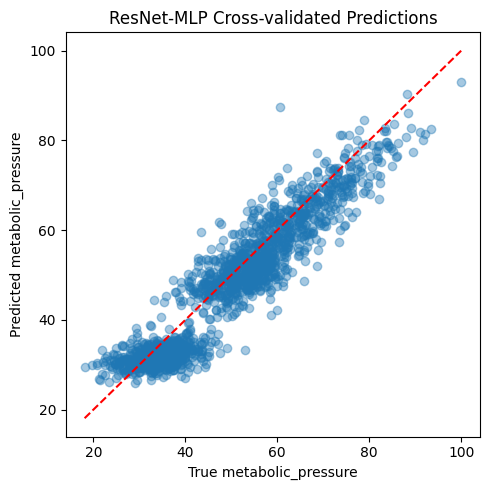

Epoch 1/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - loss: 2624.7517 - mse: 2624.7517 - val_loss: 2110.3027 - val_mse: 2110.3027
Epoch 2/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2354.7158 - mse: 2354.7158 - val_loss: 1785.5829 - val_mse: 1785.5829
Epoch 3/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2101.0684 - mse: 2101.0684 - val_loss: 1513.0797 - val_mse: 1513.0797
Epoch 4/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1859.9996 - mse: 1859.9996 - val_loss: 1369.6024 - val_mse: 1369.6024
Epoch 5/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1626.1688 - mse: 1626.1688 - val_loss: 1228.9292 - val_mse: 1228.9292
Epoch 6/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1399.7899 - mse: 1399.7899 - val_loss: 1061.2465 - val_mse: 1061.2465
Epoch 7/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1181.7791 - mse: 1181.7791 - val_loss: 894.0124 - val_mse: 894.0124
Epoch 8/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 981.6105 - mse: 981.6105 - val_loss: 723.2154 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import clone

# TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ---------------------------------------------------------
# 1. Define target (continuous metabolic pressure) and features
# ---------------------------------------------------------

# Target: continuous metabolic_pressure for regression
y = X_knn_imp["metabolic_pressure"].values.astype("float32")

# Features: drop ID, latent_cluster, metabolic_pressure
X = X_knn_imp.drop(columns=["id", "latent_cluster", "metabolic_pressure"])

# Split numeric and categorical columns
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

print("Numeric features used in ResNet-MLP (regression):", numeric_features)
print("Categorical features used in ResNet-MLP (regression):", categorical_features)

# ---------------------------------------------------------
# 2. Preprocessing pipeline (imputation + scaling + one-hot)
# ---------------------------------------------------------

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# ---------------------------------------------------------
# 3. Define ResNet-style MLP builder for REGRESSION
# ---------------------------------------------------------

def build_resnet_mlp_regressor(input_dim,
                               hidden_units=64,
                               n_blocks=2,
                               dropout_rate=0.1,
                               learning_rate=1e-3):
    """
    Build a ResNet-style MLP for regression on metabolic_pressure.

    - input_dim: number of input features
    - hidden_units: number of neurons in hidden layers
    - n_blocks: number of residual blocks
    - dropout_rate: dropout rate in each block
    - learning_rate: learning rate for Adam optimizer
    """
    inputs = layers.Input(shape=(input_dim,), name="input")

    # Initial projection to hidden_units
    x = layers.Dense(hidden_units, kernel_initializer="he_normal")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Residual blocks
    for b in range(n_blocks):
        x_in = x  # shortcut

        # First layer in the block
        x = layers.Dense(hidden_units, kernel_initializer="he_normal")(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Dropout(dropout_rate)(x)

        # Second layer in the block
        x = layers.Dense(hidden_units, kernel_initializer="he_normal")(x)
        x = layers.BatchNormalization()(x)

        # Residual connection (project shortcut if needed)
        if x_in.shape[-1] != x.shape[-1]:
            x_in = layers.Dense(hidden_units, kernel_initializer="he_normal")(x_in)

        x = layers.Add()([x, x_in])
        x = layers.ReLU()(x)

    # Output layer for regression (no activation -> linear)
    outputs = layers.Dense(1, activation="linear", name="output")(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.MeanSquaredError(name="mse"),           # 不再用 "mse" 字符串
        metrics=[tf.keras.metrics.MeanSquaredError(name="mse")]      # 同样用类
    )
    return model
# ---------------------------------------------------------
# 4. Hyperparameter candidates for ResNet-MLP regression
# ---------------------------------------------------------

hyperparams_list = [
    {"name": "small",
     "hidden_units": 32,
     "n_blocks": 1,
     "dropout_rate": 0.1,
     "learning_rate": 1e-3},
    {"name": "medium",
     "hidden_units": 64,
     "n_blocks": 1,
     "dropout_rate": 0.1,
     "learning_rate": 1e-3},
    {"name": "deep",
     "hidden_units": 64,
     "n_blocks": 2,
     "dropout_rate": 0.2,
     "learning_rate": 1e-3},
]

EPOCHS = 40
BATCH_SIZE = 64

# For regression we use plain KFold (no stratification)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# ---------------------------------------------------------
# 5. Inner CV loop: choose best hyperparameters by mean RMSE
# ---------------------------------------------------------

results_hp = []

for hp in hyperparams_list:
    print(f"\nEvaluating hyperparameters: {hp['name']} "
          f"(units={hp['hidden_units']}, blocks={hp['n_blocks']}, "
          f"dropout={hp['dropout_rate']})")

    fold_rmses = []

    for fold_idx, (train_idx, val_idx) in enumerate(cv.split(X, y), start=1):
        # Clone preprocessor for this fold
        prep = clone(preprocessor)

        # Split data
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Fit preprocessor on training fold and transform train/val
        X_train_prep = prep.fit_transform(X_train)
        X_val_prep = prep.transform(X_val)

        # Convert to float32 for Keras
        X_train_prep = np.asarray(X_train_prep, dtype="float32")
        X_val_prep = np.asarray(X_val_prep, dtype="float32")

        input_dim = X_train_prep.shape[1]

        # Build model for this fold
        model = build_resnet_mlp_regressor(
            input_dim=input_dim,
            hidden_units=hp["hidden_units"],
            n_blocks=hp["n_blocks"],
            dropout_rate=hp["dropout_rate"],
            learning_rate=hp["learning_rate"]
        )

        # Early stopping
        es = callbacks.EarlyStopping(
            monitor="val_loss",
            patience=5,
            restore_best_weights=True,
            verbose=0
        )

        # Train
        history = model.fit(
            X_train_prep, y_train,
            validation_data=(X_val_prep, y_val),
            epochs=EPOCHS,
            batch_size=BATCH_SIZE,
            callbacks=[es],
            verbose=0
        )

        # Predict on validation fold
        y_val_pred = model.predict(X_val_prep, verbose=0).ravel()

        # Compute RMSE for this fold
        mse_fold = mean_squared_error(y_val, y_val_pred)
        rmse_fold = np.sqrt(mse_fold)
        fold_rmses.append(rmse_fold)

        print(f"  Fold {fold_idx}: RMSE = {rmse_fold:.3f}")

    mean_rmse = np.mean(fold_rmses)
    std_rmse = np.std(fold_rmses)
    print(f"Mean CV RMSE for {hp['name']}: {mean_rmse:.3f} ± {std_rmse:.3f}")

    results_hp.append({
        "hyperparams": hp,
        "fold_rmses": fold_rmses,
        "mean_rmse": mean_rmse,
        "std_rmse": std_rmse
    })

# Select best hyperparameter set by lowest mean RMSE
best_result = min(results_hp, key=lambda r: r["mean_rmse"])
best_hp = best_result["hyperparams"]

print("\n====================================================")
print("Best hyperparameters for ResNet-MLP (regression):")
print(best_hp)
print("Per-fold RMSE with best hyperparams:")
for i, rmse in enumerate(best_result["fold_rmses"], start=1):
    print(f"  Fold {i}: RMSE = {rmse:.3f}")
print(f"Mean CV RMSE (best hyperparams): {best_result['mean_rmse']:.3f} "
      f"± {best_result['std_rmse']:.3f}")
print("====================================================")

# ---------------------------------------------------------
# 6. Outer CV with best hyperparameters: unbiased metrics
# ---------------------------------------------------------

y_pred_cv_all = np.zeros(len(y), dtype="float32")

for fold_idx, (train_idx, val_idx) in enumerate(cv.split(X, y), start=1):
    print(f"\nTraining final CV model on fold {fold_idx} with best hyperparams...")

    prep = clone(preprocessor)

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    X_train_prep = prep.fit_transform(X_train)
    X_val_prep = prep.transform(X_val)

    X_train_prep = np.asarray(X_train_prep, dtype="float32")
    X_val_prep = np.asarray(X_val_prep, dtype="float32")

    input_dim = X_train_prep.shape[1]

    model = build_resnet_mlp_regressor(
        input_dim=input_dim,
        hidden_units=best_hp["hidden_units"],
        n_blocks=best_hp["n_blocks"],
        dropout_rate=best_hp["dropout_rate"],
        learning_rate=best_hp["learning_rate"]
    )

    es = callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True,
        verbose=0
    )

    model.fit(
        X_train_prep, y_train,
        validation_data=(X_val_prep, y_val),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=[es],
        verbose=0
    )

    # Store predictions for this validation fold
    y_val_pred = model.predict(X_val_prep, verbose=0).ravel()
    y_pred_cv_all[val_idx] = y_val_pred

# ---------------------------------------------------------
# 7. Global regression metrics (using CV predictions)
# ---------------------------------------------------------

mse_mlp = mean_squared_error(y, y_pred_cv_all)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y, y_pred_cv_all)

print("\nRegression metrics (ResNet-MLP, CV predictions):")
print(f"RMSE (lower is better): {rmse_mlp:.3f}")
print(f"MSE  : {mse_mlp:.3f}")
print(f"R²   : {r2_mlp:.3f}")

# If你想看预测 vs 真实的散点图：
plt.figure(figsize=(5, 5))
plt.scatter(y, y_pred_cv_all, alpha=0.4)
plt.xlabel("True metabolic_pressure")
plt.ylabel("Predicted metabolic_pressure")
plt.title("ResNet-MLP Cross-validated Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")  # y=x reference line
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 8. Train final ResNet-MLP regression model on ALL data and save it
# ---------------------------------------------------------
import joblib

# 8.1 Define the feature columns used during training
#     (all predictors except id, latent_cluster, metabolic_pressure)
feature_cols = X.columns.tolist()

# 8.2 Fit the preprocessor on the FULL training data
# ---------------------------------------------------------
# 8. Train final model on ALL data with best hyperparameters & save
# ---------------------------------------------------------

# 1) 拟合最终的预处理器（用所有数据）
preprocessor_final = clone(preprocessor)
X_prep_all = preprocessor_final.fit_transform(X)
X_prep_all = np.asarray(X_prep_all, dtype="float32")
input_dim = X_prep_all.shape[1]

# 2) 构建最终 ResNet-MLP 模型
final_model = build_resnet_mlp_regressor(
    input_dim=input_dim,
    hidden_units=best_hp["hidden_units"],
    n_blocks=best_hp["n_blocks"],
    dropout_rate=best_hp["dropout_rate"],
    learning_rate=best_hp["learning_rate"]
)

# 3) 训练（可以用早停）
es_final = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=1
)

history_final = final_model.fit(
    X_prep_all, y,
    validation_split=0.1,   # 用 10% 做早停验证
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[es_final],
    verbose=1
)

# 4) 保存模型、预处理器、特征列
model_path = "resnet_mlp_regression.keras"         # 推荐用 .keras / SavedModel 格式
preprocessor_path = "resnet_mlp_preprocessor.joblib"
feature_cols_path = "resnet_mlp_feature_cols.joblib"

final_model.save(model_path)
joblib.dump(preprocessor_final, preprocessor_path)
joblib.dump(X.columns.tolist(), feature_cols_path)

print(f"\nSaved ResNet-MLP model to: {model_path}")
print(f"Saved preprocessor to: {preprocessor_path}")
print(f"Saved feature columns to: {feature_cols_path}")





In [36]:
import joblib
import tensorflow as tf
import numpy as np
import pandas as pd

# 路径根据你实际保存的位置调整
model_path = "/kaggle/working/resnet_mlp_regression.keras"          # 或你之前保存的 .h5/.keras
preprocessor_path = "/kaggle/working/resnet_mlp_preprocessor.joblib"
feature_cols_path = "/kaggle/working/resnet_mlp_feature_cols.joblib"

# 关键：compile=False，避免反序列化 mse 时出错
resnet_mlp_model = tf.keras.models.load_model(model_path, compile=False)

preprocessor_loaded = joblib.load(preprocessor_path)
feature_cols = joblib.load(feature_cols_path)
print("Loaded feature columns:", feature_cols)


Loaded feature columns: ['age', 'deprivation_index', 'alcohol_units_week', 'physical_activity_minutes', 'diet_quality_score', 'depression_score', 'bmi', 'waist_hip_ratio', 'sbp', 'dbp', 'sleep_duration_hours', 'sleep_variability_hours', 'sleep_efficiency', 'steps_per_day', 'fasting_glucose', 'fasting_insulin', 'triglycerides', 'hdl', 'ldl', 'crp', 'alt', 'family_history_diabetes', 'sex', 'ethnicity', 'smoking_status', 'shift_worker']


In [37]:
# 1. 读取外部验证集
df_val = pd.read_csv("/kaggle/input/dataset/SMHS_validation_students-1.csv")

# 2. 取和训练时完全一致的特征列
X_val = df_val[feature_cols]

# 3. 用已经拟合好的预处理器做变换
X_val_prep = preprocessor_loaded.transform(X_val)
X_val_prep = np.asarray(X_val_prep, dtype="float32")

# 4. 用 ResNet-MLP 模型做预测（连续 metabolic_pressure）
y_val_pred = resnet_mlp_model.predict(X_val_prep, verbose=0).ravel()

# 5. 生成提交文件：id + 预测的 metabolic_pressure
submission = pd.DataFrame({
    "id": df_val["id"],
    "prediction": y_val_pred
})

# 如果比赛只要前 100 个，可以：
# submission = submission.iloc[:100].copy()

submission_path = "resnet_mlp_regression.csv"
submission.to_csv(submission_path, index=False)
print(f"\nSubmission file saved to: {submission_path}")



Submission file saved to: resnet_mlp_regression.csv
